In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 248 kB 1.9 MB/s 
     |████████████████████████████████| 3.1 MB 17.4 MB/s 
     |████████████████████████████████| 102 kB 31.9 MB/s 
     |████████████████████████████████| 2.6 MB 32.2 MB/s 
     |████████████████████████████████| 1.1 MB 61.1 MB/s 
     |████████████████████████████████| 295 kB 30.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=764ca24e7241e67fb757623e60a51f860c5a8c93da018d2abc8d33492e934b03
  Stored in directory: /Users/adwoanyame/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107412 sha256=13d495ce89d8b2e527ceb499209a4dca440493535a5d2e9b826a80208573b962
  Stored in directory: /Users/adwoanyame/Library/Caches/pip/wheels/72/9a/23/097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built htmlmin phik


In [2]:
# Load packages
import os
import pandas as pd
import numpy as np

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Advanced plotting functionality with seaborn
import seaborn as sns

#Package for missing data cleaning
import missingno as msno

#Panda Profiling for dataframe report
from pandas_profiling import ProfileReport


In [3]:
%%time
df = pd.read_csv('data/ppp_loans.csv.gz', compression='gzip', low_memory=False)

CPU times: user 2min 35s, sys: 46.5 s, total: 3min 21s
Wall time: 3min 42s


In [4]:
%%time
df

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


,Unnamed: 0,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
0,0,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN
1,1,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,...,NaN,NaN,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
2,2,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,...,NaN,NaN,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
3,3,6448037706,05/01/2020,515.0,PPP,OPTIMIZED PROCESS SOLUTIONS DBA AAA INDUSTRIES,24500 CAPITOL,REDFORD,NaN,48239-2446,...,NaN,NaN,Limited Liability Company(LLC),9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN
4,4,9609017706,05/01/2020,464.0,PPP,"D2 POWER SPORTS, LLC",125 Simuel Dr.,Spartanburg,NaN,29303-2085,...,NaN,NaN,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697214,10697214,4395967002,04/03/2020,897.0,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,...,NaN,NaN,Corporation,42366.0,Platte Valley Bank,TORRINGTON,WY,Male Owned,Non-Veteran,NaN
10697215,10697215,6985647108,04/14/2020,897.0,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,...,NaN,NaN,Non-Profit Childcare Center,122813.0,NebraskaLand National Bank,NORTH PLATTE,NE,Unanswered,Unanswered,Y
10697216,10697216,7996438405,02/12/2021,897.0,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,...,NaN,NaN,Subchapter S Corporation,77189.0,First National Bank of Gillette,GILLETTE,WY,Female Owned,Unanswered,NaN
10697217,10697217,9054647103,04/15/2020,897.0,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,...,NaN,NaN,Corporation,25901.0,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN


In [9]:
#Shape of data
df.shape

(10697219, 52)

In [25]:
#Coloumns of df
df.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
       'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
       'OriginatingLender', 'Originatin

In [6]:
#Data types of DF
df.dtypes

LoanNumber                       int64
DateApproved                    object
SBAOfficeCode                  float64
ProcessingMethod                object
BorrowerName                    object
BorrowerAddress                 object
BorrowerCity                    object
BorrowerState                   object
BorrowerZip                     object
LoanStatusDate                  object
LoanStatus                      object
Term                             int64
SBAGuarantyPercentage            int64
InitialApprovalAmount          float64
CurrentApprovalAmount          float64
UndisbursedAmount              float64
FranchiseName                   object
ServicingLenderLocationID      float64
ServicingLenderName             object
ServicingLenderAddress          object
ServicingLenderCity             object
ServicingLenderState            object
ServicingLenderZip              object
RuralUrbanIndicator             object
HubzoneIndicator                object
LMIIndicator             

In [23]:
#Values Counts

columns_to_count = ['BorrowerState', 
                    'LoanStatus',
                    'Term', 
                    'NonProfit',
                    'ServicingLenderState',
                   'RuralUrbanIndicator',
                   'HubzoneIndicator',
                   'LMIIndicator',
                   'BusinessAgeDescription',
                   'ProjectState',
                   'CD',
                    'NAICSCode',
                   'Race',
                   'Ethnicity',
                   'BusinessType',
                   'OriginatingLender',
                   'OriginatingLenderState',
                   'Gender',
                   'Veteran']


for col in df[columns_to_count]:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(10))

----------------------------------------BorrowerState---------------------------------------- - 

CA    1180893
FL     900252
TX     863797
NY     690739
IL     583882
GA     479178
OH     324977
PA     320884
NJ     286578
MI     273015
Name: BorrowerState, dtype: int64

----------------------------------------LoanStatus---------------------------------------- - 

Exemption 4            7076485
Paid in Full           2139775
Active Un-Disbursed    1480959
Name: LoanStatus, dtype: int64

----------------------------------------Term---------------------------------------- - 

60    6247259
24    4439520
59       7921
23       2152
58        146
33         35
19         23
52         20
49         16
22         11
Name: Term, dtype: int64

----------------------------------------NonProfit---------------------------------------- - 

Y    263757
Name: NonProfit, dtype: int64

----------------------------------------ServicingLenderState---------------------------------------- - 

OH    914079
CA    897472
TX    786019
NJ    721623
NC    700352
FL    687531
PA    516955
NY    513817
SD    416354
UT    356890
Name: ServicingLenderState, dtype: int64

----------------------------------------RuralUrbanIndicator---------------------------------------- - 

U    8371863
R    2325356
Name: RuralUrbanIndicator, dtype: int64

----------------------------------------HubzoneIndicator---------------------------------------- - 

N    8540199
Y    2157020
Name: HubzoneIndicator, dtype: int64

----------------------------------------LMIIndicator---------------------------------------- - 

N    7822208
Y    2875007
Name: LMIIndicator, dtype: int64

----------------------------------------BusinessAgeDescription---------------------------------------- - 

Existing or more than 2 years old         9457091
New Business or 2 years or less            703113
Unanswered                                 531496
Startup, Loan Funds will Open Business       3320
Change of Ownership                          2199
Name: BusinessAgeDescription, dtype: int64

----------------------------------------ProjectState---------------------------------------- - 

CA    1180896
FL     900260
TX     863806
NY     690748
IL     583854
GA     479181
OH     324968
PA     320887
NJ     286583
MI     273013
Name: ProjectState, dtype: int64

----------------------------------------CD---------------------------------------- - 

NY-12    67097
IL-07    65594
PR-      64921
GA-05    63044
SD-      62876
IL-02    61365
IA-04    60298
FL-25    58298
NE-03    57856
NY-10    56484
Name: CD, dtype: int64

----------------------------------------NAICSCode---------------------------------------- - 

812112.0    392624
722511.0    322868
531210.0    238955
812990.0    212663
112111.0    208740
541110.0    198302
485310.0    183093
621111.0    174679
621210.0    172210
484110.0    159961
Name: NAICSCode, dtype: int64

----------------------------------------Race---------------------------------------- - 

Unanswered                                   8257211
White                                        1438509
Black or African American                     662154
Asian                                         250942
American Indian or Alaska Native               79326
Native Hawaiian or Other Pacific Islander       8338
Puerto Rican                                     663
Multi Group                                       55
Eskimo & Aleut                                    21
Name: Race, dtype: int64

----------------------------------------Ethnicity---------------------------------------- - 

Unknown/NotStated         7774690
Not Hispanic or Latino    2609904
Hispanic or Latino         312625
Name: Ethnicity, dtype: int64

----------------------------------------BusinessType---------------------------------------- - 

Sole Proprietorship                3031152
Limited  Liability Company(LLC)    2331948
Corporation                        2279173
Subchapter S Corporation           1063152
Self-Employed Individuals           774170
Independent Contractors             670057
Non-Profit Organization             242739
Partnership                         117161
Limited Liability Partnership        58754
Single Member LLC                    46891
Name: BusinessType, dtype: int64

----------------------------------------OriginatingLender---------------------------------------- - 

Bank of America, National Association        489325
Cross River Bank                             471609
JPMorgan Chase Bank, National Association    435357
Capital Plus Financial, LLC                  380377
Harvest Small Business Finance, LLC          377620
Customers Bank                               279880
Wells Fargo Bank, National Association       277949
Benworth Capital                             275920
Fountainhead SBF LLC                         233226
Itria Ventures LLC                           193336
Name: OriginatingLender, dtype: int64

----------------------------------------OriginatingLenderState---------------------------------------- - 

OH    914190
CA    846726
TX    784811
NC    700353
NJ    687328
FL    679257
PA    478846
UT    437596
NY    436412
SD    416351
Name: OriginatingLenderState, dtype: int64

----------------------------------------Gender---------------------------------------- - 

Unanswered      6716153
Male Owned      2656817
Female Owned    1324249
Name: Gender, dtype: int64

----------------------------------------Veteran---------------------------------------- - 

Unanswered     7378981
Non-Veteran    3137207
Veteran         181031
Name: Veteran, dtype: int64

In [26]:
#Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['LoanNumber' 'SBAOfficeCode' 'Term' 'SBAGuarantyPercentage'
 'InitialApprovalAmount' 'CurrentApprovalAmount' 'UndisbursedAmount'
 'ServicingLenderLocationID' 'JobsReported' 'NAICSCode'
 'UTILITIES_PROCEED' 'PAYROLL_PROCEED' 'MORTGAGE_INTEREST_PROCEED'
 'RENT_PROCEED' 'REFINANCE_EIDL_PROCEED' 'HEALTH_CARE_PROCEED'
 'DEBT_INTEREST_PROCEED' 'OriginatingLenderLocationID']


In [27]:
#Select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['DateApproved' 'ProcessingMethod' 'BorrowerName' 'BorrowerAddress'
 'BorrowerCity' 'BorrowerState' 'BorrowerZip' 'LoanStatusDate'
 'LoanStatus' 'FranchiseName' 'ServicingLenderName'
 'ServicingLenderAddress' 'ServicingLenderCity' 'ServicingLenderState'
 'ServicingLenderZip' 'RuralUrbanIndicator' 'HubzoneIndicator'
 'LMIIndicator' 'BusinessAgeDescription' 'ProjectCity' 'ProjectCountyName'
 'ProjectState' 'ProjectZip' 'CD' 'Race' 'Ethnicity' 'BusinessType'
 'OriginatingLender' 'OriginatingLenderCity' 'OriginatingLenderState'
 'Gender' 'Veteran' 'NonProfit']


In [29]:
#Invesigating Missing Data - List of Missing Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

LoanNumber - 0%
DateApproved - 0%
SBAOfficeCode - 0%
ProcessingMethod - 0%
BorrowerName - 0%
BorrowerAddress - 0%
BorrowerCity - 0%
BorrowerState - 0%
BorrowerZip - 0%
LoanStatusDate - 66%
LoanStatus - 0%
Term - 0%
SBAGuarantyPercentage - 0%
InitialApprovalAmount - 0%
CurrentApprovalAmount - 0%
UndisbursedAmount - 0%
FranchiseName - 99%
ServicingLenderLocationID - 0%
ServicingLenderName - 0%
ServicingLenderAddress - 0%
ServicingLenderCity - 0%
ServicingLenderState - 0%
ServicingLenderZip - 0%
RuralUrbanIndicator - 0%
HubzoneIndicator - 0%
LMIIndicator - 0%
BusinessAgeDescription - 0%
ProjectCity - 0%
ProjectCountyName - 0%
ProjectState - 0%
ProjectZip - 0%
CD - 0%
JobsReported - 0%
NAICSCode - 1%
Race - 0%
Ethnicity - 0%
UTILITIES_PROCEED - 68%
PAYROLL_PROCEED - 0%
MORTGAGE_INTEREST_PROCEED - 97%
RENT_PROCEED - 95%
REFINANCE_EIDL_PROCEED - 99%
HEALTH_CARE_PROCEED - 98%
DEBT_INTEREST_PROCEED - 99%
BusinessType - 0%
OriginatingLenderLocationID - 0%
OriginatingLender - 0%
OriginatingLende

In [32]:
#Count values in each coloumn
df.count()

LoanNumber                     10697219
DateApproved                   10697219
SBAOfficeCode                  10697211
ProcessingMethod               10697219
BorrowerName                   10697161
BorrowerAddress                10697019
BorrowerCity                   10697033
BorrowerState                  10697070
BorrowerZip                    10697039
LoanStatusDate                  3620734
LoanStatus                     10697219
Term                           10697219
SBAGuarantyPercentage          10697219
InitialApprovalAmount          10697219
CurrentApprovalAmount          10697219
UndisbursedAmount              10689488
FranchiseName                    148842
ServicingLenderLocationID      10697211
ServicingLenderName            10697211
ServicingLenderAddress         10697211
ServicingLenderCity            10697211
ServicingLenderState           10697211
ServicingLenderZip             10697211
RuralUrbanIndicator            10697219
HubzoneIndicator               10697219


In [30]:
#Number of non-Nan entries in df
np.sum(df.count())

457793559

In [33]:
#Number of Nan entries in df
df.isna().sum()

LoanNumber                            0
DateApproved                          0
SBAOfficeCode                         8
ProcessingMethod                      0
BorrowerName                         58
BorrowerAddress                     200
BorrowerCity                        186
BorrowerState                       149
BorrowerZip                         180
LoanStatusDate                  7076485
LoanStatus                            0
Term                                  0
SBAGuarantyPercentage                 0
InitialApprovalAmount                 0
CurrentApprovalAmount                 0
UndisbursedAmount                  7731
FranchiseName                  10548377
ServicingLenderLocationID             8
ServicingLenderName                   8
ServicingLenderAddress                8
ServicingLenderCity                   8
ServicingLenderState                  8
ServicingLenderZip                    8
RuralUrbanIndicator                   0
HubzoneIndicator                      0


In [43]:
#Number of Unanswered in df
df[df == 'Unanswered'].count()

LoanNumber                           0
DateApproved                         0
SBAOfficeCode                        0
ProcessingMethod                     0
BorrowerName                         0
BorrowerAddress                      0
BorrowerCity                         0
BorrowerState                        0
BorrowerZip                          0
LoanStatusDate                       0
LoanStatus                           0
Term                                 0
SBAGuarantyPercentage                0
InitialApprovalAmount                0
CurrentApprovalAmount                0
UndisbursedAmount                    0
FranchiseName                        0
ServicingLenderLocationID            0
ServicingLenderName                  0
ServicingLenderAddress               0
ServicingLenderCity                  0
ServicingLenderState                 0
ServicingLenderZip                   0
RuralUrbanIndicator                  0
HubzoneIndicator                     0
LMIIndicator             

<AxesSubplot:>

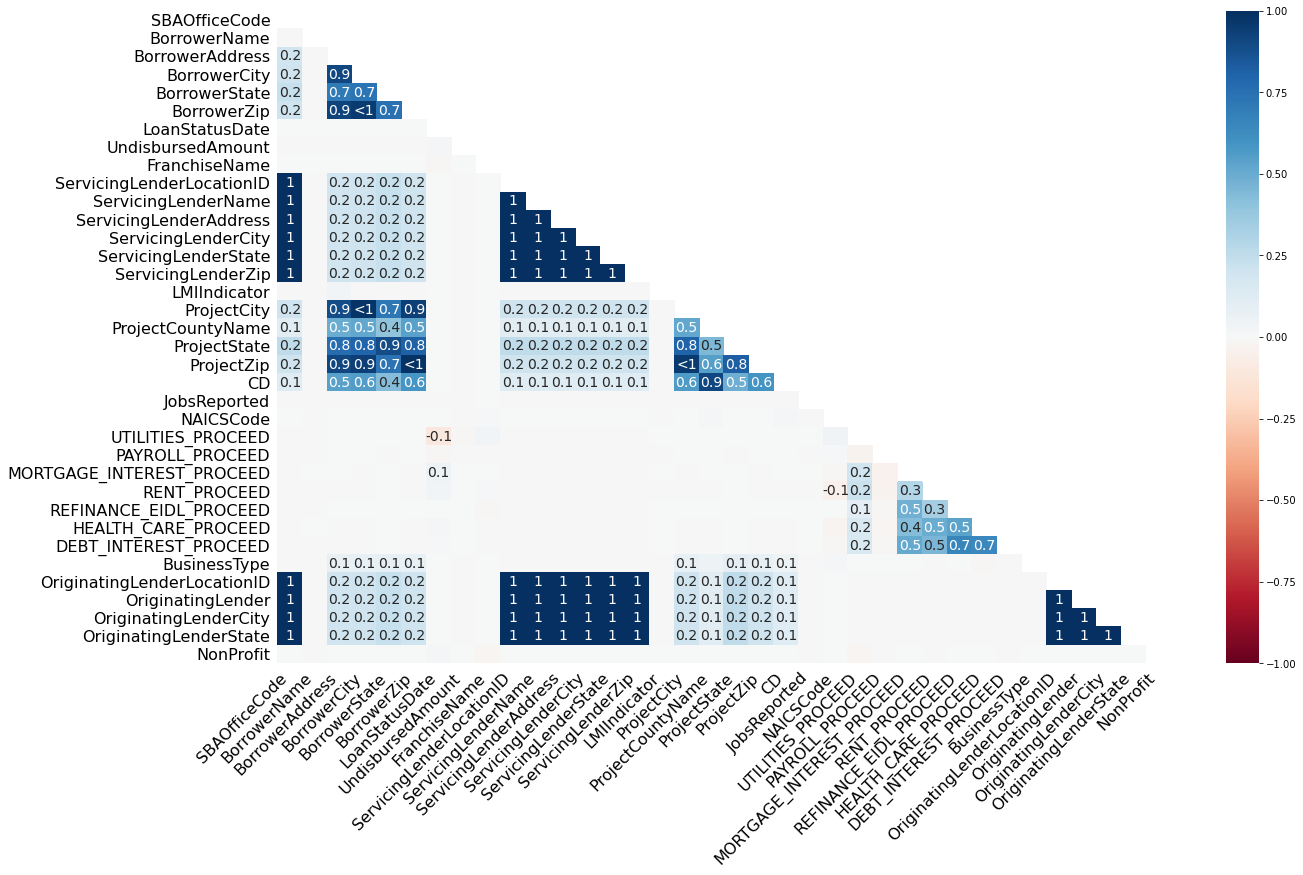

In [36]:
#Measures nullity correlation
#How strongly the presence/absence  one variable affects the presence of another
import missingno as msno
msno.heatmap(df)